# Projeto Final

Qual o problema?
- A precificação de imóveis é necessária para atender clientes , corretores e imobiliárias. Diversas variáveis podem ser correlacionadas para estimar o preço.
- Deve-se criar hipoteses e inferências a partir de gráficos
- A partir dos gráficos podemos ter Insights
- A partir dos Insights vou definir algoritmos para treinar modelos

# Meu DataSet

In [1]:
! pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets/Preços_de_casas.csv')

In [4]:
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


# Correlações das Variáveis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [6]:
df = df.drop(columns= "Id")

In [7]:
df

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.00
1,117.2398,0,0.0000,2,460,0,894795.00
2,85.4680,1,80.4514,2,608,0,1101855.00
3,89.2769,1,70.2324,1,642,0,690200.00
4,106.3705,1,97.8237,2,836,0,1232500.00
...,...,...,...,...,...,...,...
1433,88.5337,1,64.4726,2,460,0,862750.00
1434,192.5817,0,0.0000,2,500,0,1035300.00
1435,110.3652,1,107.0208,2,252,0,1313845.00
1436,100.1462,0,0.0000,1,240,0,700676.25


In [11]:
# crie uma variável de correlação

corr = df.corr()

In [8]:
df.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

In [12]:
# queremos descobrir a correlação
# intensidade
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

In [13]:
! pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.5 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)


In [14]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [16]:
! pip install plotly.express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'Preço de venda')

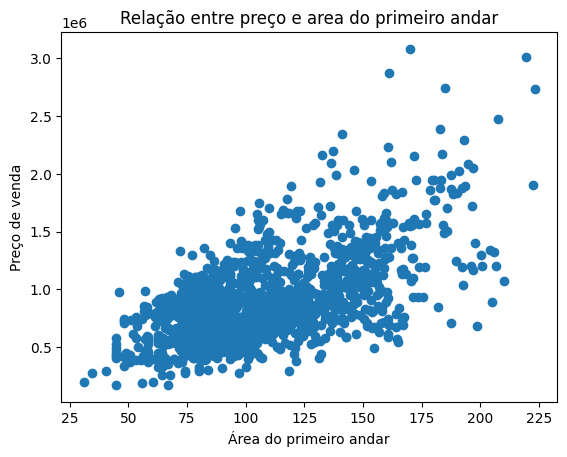

In [19]:
plt.scatter(df['area_primeiro_andar'],df['preco_de_venda'])
plt.title("Relação entre preço e area do primeiro andar")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")